Projeto de Ciências de Dados seguindo a metodolodia do KDD (Knowledge Discovery in Databases) para análise dos dados de rodas de Terapia Comunitária nos convênios com Ministério da Saúde nos anos de 2008, 2009 e 2011.

([KDD e Data Mining: mais do que apenas conceitos](https://itforum.com.br/colunas/kdd-e-data-mining-mais-do-que-apenas-conceitos))

# Etapa 1: Seleção dos Dados

## Lendo o dataset com Pandas

O dataset já está consolidado os dados dos convênios:
* **2008**: Convênio: 2397/2008 Parceria: Ministério da Saúde / FCPC – Fundação
Cearense de Pesquisa e Cultura / MISMEC-CE – Movimento Integrado de Saúde
Mental Comunitária
* **2009**: Convênio: 3363/2009 Parceria: Ministério da Saúde / FCPC – Fundação
Cearense de Pesquisa e Cultura / MISMEC-CE – Movimento Integrado de Saúde
Mental Comunitária
* **2011**: Convênio “Capacitação em Terapia Comunitária Integrativa com ênfase em
contextos de calamidades públicas” (nº 26203/11-74 - TC 101 FNS / UFC). Parceria: Ministério da Saúde / UFC - Universidade Federal do Ceará / FCPC –
Fundação Cearense de Pesquisa e Cultura / MISMEC-CE – Movimento Integrado
de Saúde Mental Comunitária.

Nessa etapa, os dados já foram consolidados na planilha, filtrando os registros com possível duplicidade, ou seja, registros de uma mesma terapia que podem ter sido submetidos por terapeutas de uma mesma equipe.

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# Baixando o dataset do GitHub
url= "https://github.com/rafaeld3castro/tcc2/raw/main/src/main/resources/dataset.xlsx"

# Lendo o datase e transformando em um dataframe do pandas
dados = pd.read_excel(url)

## Padronizando o nome das colunas do dataset para facilitar a visualização dos dados

O nome dos rótulos originais estão sendo simplicados para facilitar a visuação do dataset, bem como simplicar as leitura das colunas no código. Segue abaixo a legenda para cada rótulo reescrito do dataset:

**Temas propostos (dado booleano - 0 ou 1):**

*   `t_conflitos_fam` = Conflitos Familiares
*   `t_violencia` = Violência
*   `t_conflitos` = Conflitos
*   `t_problemas_esc` = Problemas Escolares
*   `t_drogas` = Drogas
*   `t_alcoolismo` = Alcoolismo
*   `t_tabaco` = Tabaco
*   `t_depressao` = Depressão
*   `t_trabalho` = Trabalho
*   `t_aband_disc_rej` = Abandono, Discriminação, Rejeição
*   `t_problemas_men` = Problemas Mentais e Neurológicos
*   `t_prostituicao` = Prostituição

**Estratégias de enfrentamento (dado booleano - 0 ou 1):**

*   `e_fort_empod` = Fortalecimento / empoderamento pessoal
*   `e_ajuda_rel_esp` = Buscar ajuda religiosa ou espiritual
*   `e_cuid_rel_fam` = Cuidar e se relacionar melhor com a família
*   `e_busca_ajuda_pro` = Buscar ajuda profissional e ações de cidadania (Serviços Públicos)
*   `e_auto_cuidado` = Auto-cuidado - busca de recursos da cultura
*   `e_participar_tc` = Participar de terapia comunitária
*   `e_busca_redes_solid` = Buscar redes solidárias



In [76]:
dados = dados.rename(columns={
    "uf": "data",
    "Data": "data",
    "Horário": "hora",
    "Estresse": "t_estresse",
    "Conflitos Familiares": "t_conflitos_fam",
    "Violência": "t_violencia",
    "Conflitos": "t_conflitos",
    "Problemas Escolares": "t_problemas_esc",
    "Drogas ": "t_drogas",
    "Alcoolismo": "t_alcoolismo",
    "Tabaco": "t_tabaco",
    "Depressão": "t_depressao",
    "Trabalho": "t_trabalho",
    "Abandono, Discriminação, Rejeição": "t_aband_disc_rej",
    "Problemas Mentais e Neurológicos": "t_problemas_men",
    "Prostituição": "t_prostituicao",
    "Outro:": "t_outro",
    "Qual:": "t_outro_qual",
    "Tema Escolhido:": "t_escolhido",
    "Fortalecimento / empoderamento pessoal": "e_fort_empod",
    "Buscar ajuda religiosa ou espiritual ": "e_ajuda_rel_esp",
    "Cuidar e se relacionar melhor com a família ": "e_cuid_rel_fam",
    "Buscar ajuda profissional e ações de cidadania (Serviços Públicos) ": "e_busca_ajuda_pro",
    "Auto-cuidado - busca de recursos da cultura ": "e_auto_cuidado",
    "Participar de terapia comunitária ": "e_participar_tc",
    "Buscar redes solidárias": "e_busca_redes_solid",
    "Outras ": "e_outras",
    "Qual:.1": "e_outras_qual",
    "Unnamed: 37": "depoimentos"
})
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   convenio             13354 non-null  object
 1   UF                   13344 non-null  object
 2   data                 13298 non-null  object
 3   hora                 13278 non-null  object
 4   f_criancas           13354 non-null  int64 
 5   f_adolescentes       13354 non-null  int64 
 6   f_adultos            13354 non-null  int64 
 7   f_idosos             13354 non-null  int64 
 8   m_criancas           13354 non-null  int64 
 9   m_adolescentes       13354 non-null  int64 
 10  m_adultos            13354 non-null  int64 
 11  m_idosos             13354 non-null  int64 
 12  t_estresse           13354 non-null  int64 
 13  t_conflitos_fam      13354 non-null  int64 
 14  t_violencia          13354 non-null  int64 
 15  t_conflitos          13354 non-null  int64 
 16  t_pr

# Etapa 2: Processamento

## Explorando os dados

In [77]:
dados.head()

,convenio,UF,data,hora,f_criancas,f_adolescentes,f_adultos,f_idosos,m_criancas,m_adolescentes,...,e_fort_empod,e_ajuda_rel_esp,e_cuid_rel_fam,e_busca_ajuda_pro,e_auto_cuidado,e_participar_tc,e_busca_redes_solid,e_outras,e_outras_qual,depoimentos
0,2008_ms_2397,AM,18/11/2008,15:00:00,0,0,0,15,0,0,...,1,1,0,0,0,0,1,0,NaN,CALMA PACIÊNCIA PAZ FELICIDADE
1,2008_ms_2397,AM,2008-12-03 00:00:00,09:00:00,8,6,0,0,10,0,...,0,0,1,0,0,0,0,0,NaN,RESILIÊNCIA
2,2008_ms_2397,AM,2008-12-03 00:00:00,16:00:00,8,12,0,0,0,8,...,0,1,1,1,0,0,0,0,NaN,CONFIANÇA AMOR
3,2008_ms_2397,AM,2008-12-02 00:00:00,09:00:00,5,8,0,0,2,12,...,1,0,1,1,0,0,0,0,NaN,COMPREENSÃO PERDÃO COMPANHEIRISMO
4,2008_ms_2397,AM,2008-12-02 00:00:00,14:00:00,4,11,0,0,8,12,...,0,1,1,0,0,1,0,0,NaN,SAUDADE AMIZADE ENTENDER O OUTRO


In [78]:
dados.describe()

,f_criancas,f_adolescentes,f_adultos,f_idosos,m_criancas,m_adolescentes,m_adultos,m_idosos,t_estresse,t_conflitos_fam,...,t_aband_disc_rej,t_problemas_men,t_prostituicao,e_ajuda_rel_esp,e_cuid_rel_fam,e_busca_ajuda_pro,e_auto_cuidado,e_participar_tc,e_busca_redes_solid,e_outras
count,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,...,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,0.582822,0.923244,7.450577,2.142579,0.437322,0.647671,2.007414,0.598098,0.597724,0.471919,...,0.181219,0.048001,0.019021,0.503145,0.410364,0.291598,0.208402,0.379662,0.484199,0.039838
std,1.880917,2.774836,7.052126,4.083442,1.714167,2.464536,3.466568,1.673624,0.490375,0.499529,...,0.385214,0.213775,0.136602,0.500009,0.491918,0.454515,0.406181,0.485321,0.499769,0.195586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,44.000000,51.000000,216.000000,52.000000,45.000000,40.000000,56.000000,35.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Processamento dos dados de público da terapia

### Processamento para sintizar o quantitativo de cada público

In [79]:
dados['criancas'] = dados["f_criancas"] + dados["m_criancas"]
dados['adolescentes'] = dados["f_adolescentes"] + dados["m_adolescentes"]
dados['adultos'] = dados["f_adultos"] + dados["m_adultos"]
dados['idosos'] = dados["f_idosos"] + dados["m_idosos"]

In [80]:
dados['total_pessoas'] = dados['adolescentes'] + dados['adultos'] + dados['idosos'] + dados['criancas']

### Processamento para sintetizar o público por genêro biológico

In [81]:
dados['feminino'] = dados['f_adolescentes'] + dados['f_adultos'] + dados['f_idosos'] + dados['f_criancas']
dados['masculino'] = dados['m_adolescentes'] + dados['m_adultos'] + dados['m_idosos'] + dados['m_criancas']

### Processamento com total por faixa etária e por genêro biológico

In [82]:
dados.loc[:,['idosos','adolescentes','adultos', 'criancas','total_pessoas','feminino','masculino']].head(10)

,idosos,adolescentes,adultos,criancas,total_pessoas,feminino,masculino
0,25,0,0,0,25,15,10
1,0,6,0,18,24,14,10
2,0,20,0,8,28,20,8
3,0,20,0,7,27,13,14
4,0,23,0,12,35,15,20
5,0,19,0,8,27,14,13
6,0,22,0,6,28,16,12
7,0,16,0,9,25,19,6
8,0,10,0,13,23,12,11
9,0,28,0,20,48,24,24


In [83]:
dados.shape

(13354, 45)

### Histrogramas

<Axes: xlabel='adolescentes', ylabel='Count'>

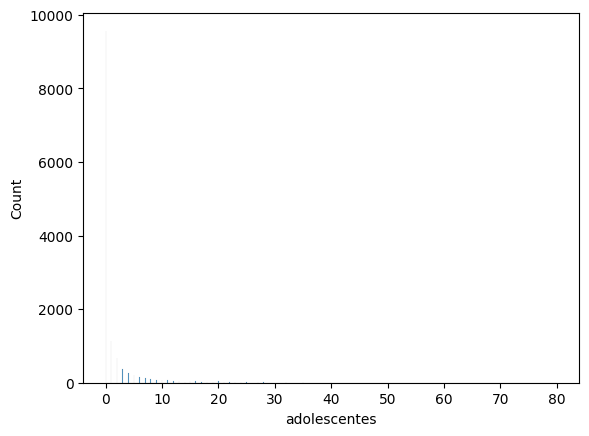

In [84]:
sns.histplot(dados, x='adolescentes')

<Axes: xlabel='adultos', ylabel='Count'>

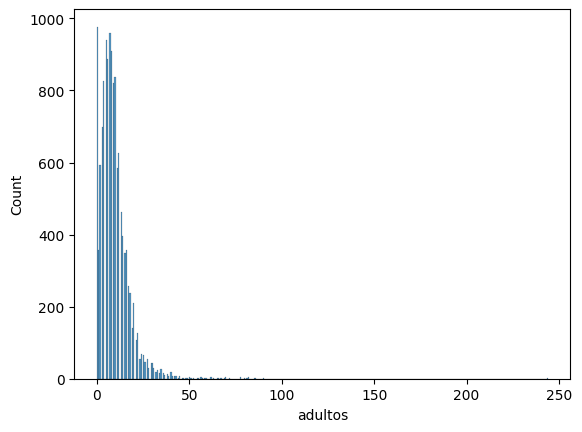

In [85]:
sns.histplot(dados, x='adultos')

<Axes: xlabel='criancas', ylabel='Count'>

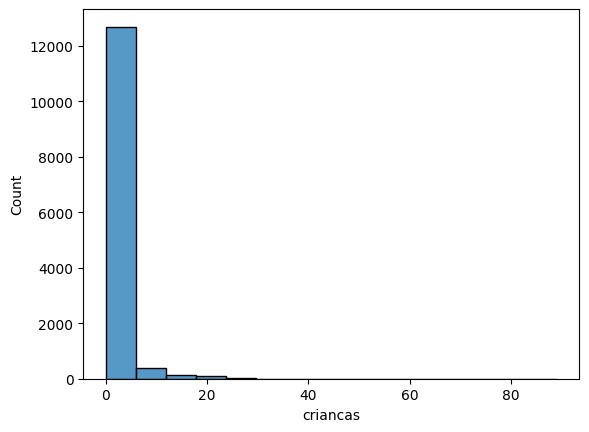

In [86]:
sns.histplot(dados, x='criancas')

<Axes: xlabel='idosos', ylabel='Count'>

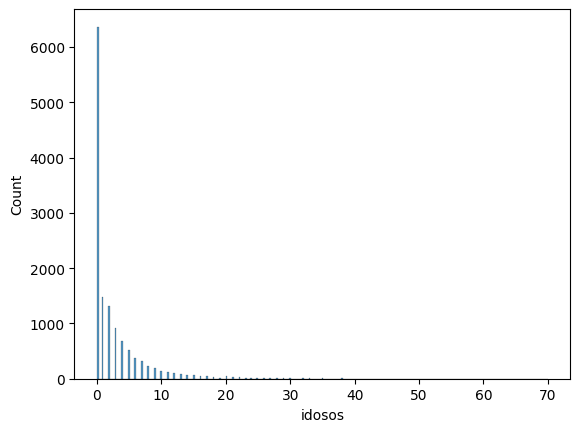

In [87]:
sns.histplot(dados, x='idosos')

### Gráficos de Barras

In [88]:
total_criancas = dados['criancas'].sum()
total_adolescentes = dados['adolescentes'].sum()
total_adultos = dados['adultos'].sum()
total_idosos = dados['idosos'].sum()

In [89]:
total_feminino = dados['feminino'].sum()
total_masculino = dados['masculino'].sum()

In [90]:
categorias = ['feminino', 'masculino']
totais = [total_feminino, total_masculino]

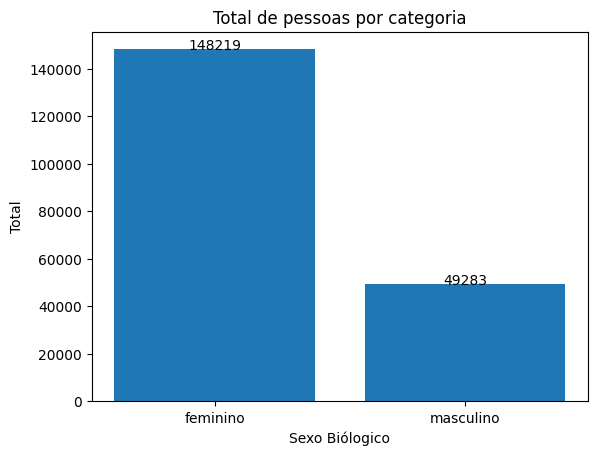

In [91]:
# Criar o gráfico de barras
plt.bar(categorias, totais)

# Adicionar os valores acima das barras
for i, v in enumerate(totais):
    plt.text(i, v+30, str(v), ha='center')

# Configurar o gráfico
# A época não a classição estava binária, e não incluía os grupos minoritários
plt.xlabel('Sexo Biólogico')
plt.ylabel('Total')
plt.title('Total de pessoas por categoria')

# Exibir o gráfico
plt.show()


In [92]:
categorias = ['criancas', 'adolescentes','adultos','idosos']
totais =  [total_criancas, total_adolescentes,total_adultos,total_idosos]

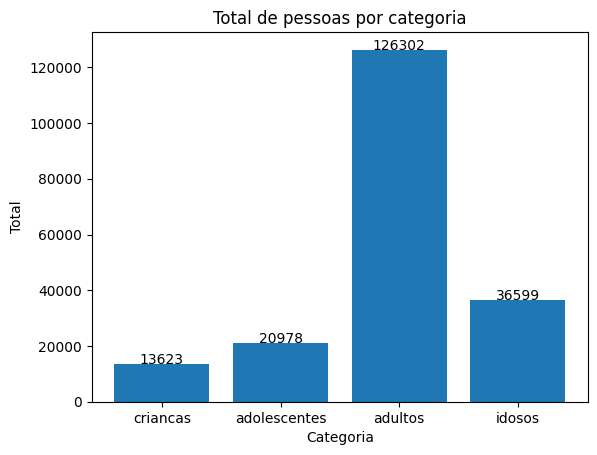

In [93]:
# Criar o gráfico de barras
plt.bar(categorias, totais)

# Adicionar os valores acima das barras
for i, v in enumerate(totais):
    plt.text(i, v+30, str(v), ha='center')

# Configurar o gráfico
plt.xlabel('Categoria')
plt.ylabel('Total')
plt.title('Total de pessoas por categoria')

# Exibir o gráfico
plt.show()


# Etapa 3: Transformação e Mineração dos Dados

# Etapa 4: Análise e criação do modelo